In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u, constants as c

In [60]:
T_CMB = 2.725*u.K
I_0 = 2*(c.k_B*T_CMB)**3/(c.h*c.c)**2
    
Mpc = 1*10**6*u.pc
keV = 1000*u.eV
GHz = 10**9*u.Hz
k = c.k_B.to((u.kg*u.m**2)/(u.K*u.s**2))

nu = np.linspace(0,350,200)*10**9*u.Hz
freq = (c.h*nu).to(u.J)
temp = (c.k_B*T_CMB)
x = freq/temp

def I_nu(nu):
    
    I_nu = ((2*c.h*nu**3)/(c.c**2))*(np.exp(x)-1)**(-1)
    
    return I_nu


def f_tSZ(nu):
    
    f_tSZ = (x**4*np.exp(x)/(np.exp(x)-1)**2)*((x*(np.exp(x)+1)/(np.exp(x)-1))-4)
    
    return f_tSZ

def g_kSZ(nu):
    
    g_kSZ = x*((np.exp(x)+1)/(np.exp(x)-1))-4
    
    return g_kSZ

def y_tSZ(tau, T_e):
    y_tSZ = k*T_e*tau/(c.m_e*c.c**2)
    
    return y_tSZ

def y_kSZ(tau, v_z):
    y_kSZ = -v_z*tau/c.c
    
    return y_kSZ
    
    
def S_t(nu, tau, T_e):
    S_t = f_tSZ(nu)*y_tSZ(tau, T_e)
    
    return S_t

def S_k(nu, tau, v_z):
    S_k = g_kSZ(nu)*y_kSZ(tau, v_z)
    
    return S_k

In [48]:
tau = 10**(-2)
T_e_5keV = 5.92*10**7*u.K
T_e_15keV = 1.78*10**8*u.K
tSZ_5keV = S_t(nu, tau, T_e_5keV)
tSZ_15keV = S_t(nu, tau, T_e_15keV)

C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


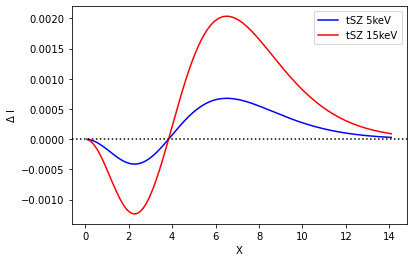

In [55]:
plt.plot(x, tSZ_5keV, color = 'blue', label = 'tSZ 5keV')
plt.plot(x, tSZ_15keV, color = 'red', label = 'tSZ 15keV')
plt.axhline(y=0, ls = ':', color = 'black')
plt.xlabel('X')
plt.ylabel('\u0394 I')
plt.legend()
#plt.yscale('log')

C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in reciprocal
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


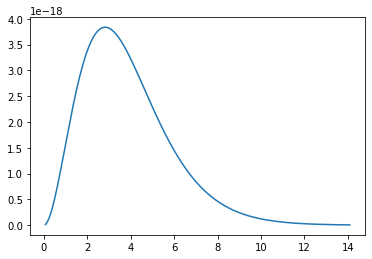

In [37]:
freq = (c.h*nu).to(u.J)
temp = (c.k_B*T_CMB)
x = freq/temp
plt.plot(x, I_nu(nu))
#plt.xscale('log')

C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


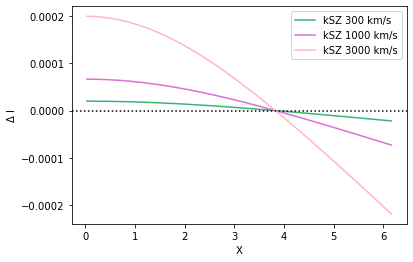

In [122]:
v_300 = 3*10**5*u.m*u.s**(-1)
v_1000 = 1*10**6*u.m*u.s**(-1)
v_3000 = 3*10**6*u.m*u.s**(-1)

kSZ_300v = S_k(nu, tau, v_300)
kSZ_1000v = S_k(nu, tau, v_1000)
kSZ_3000v = S_k(nu, tau, v_3000)

plt.plot(x, kSZ_300v, color = 'mediumseagreen', label = 'kSZ 300 km/s')
plt.plot(x, kSZ_1000v, color = 'orchid', label = 'kSZ 1000 km/s')
plt.plot(x, kSZ_3000v, color = 'lightpink', label = 'kSZ 3000 km/s')

plt.axhline(y=0, ls = ':', color = 'black')

plt.xlabel("X")
plt.ylabel('\u0394 I')

plt.legend()


In [83]:
#reproducing Tony's figure 10 (hopefully)
nu = np.linspace(0,350,200)*GHz

T_e_B = 1.6*10**8*u.K
T_e_C = 2.8*10**8*u.K

v_z_B_modeled = 3.6*10**6*u.m*u.s**(-1)
v_z_C_modeled = -3.72*10**6*u.m*u.s**(-1)

v_B_measured = 4.64*10**6*u.m*u.s**(-1)
v_C_measured = -4.12*10**6*u.m*u.s**(-1)

I_B = S_t(nu, tau, T_e_B) + S_k(nu, tau, v_z_B_modeled)
I_C = S_t(nu, tau, T_e_C) + S_k(nu, tau, v_z_C_modeled)

I_B_measured = S_t(nu, tau, T_e_B) + S_k(nu, tau, v_B_measured)
I_C_measured = S_t(nu, tau, T_e_C) + S_k(nu, tau, v_C_measured)

y_kSZ_B = S_k(nu,tau, v_z_B_modeled)
y_kSZ_C = S_k(nu,tau, v_z_C_modeled)

y_kSZ_B_measured = S_k(nu,tau, v_B_measured)
y_kSZ_C_measured = S_k(nu,tau, v_C_measured)

y_tSZ_B = S_t(nu, tau, T_e_B)
y_tSZ_C = S_t(nu, tau, T_e_C)

C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


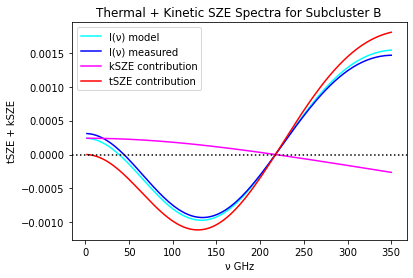

In [102]:
plt.plot(nu, I_B, color='aqua', label = 'I(\u03BD) model')
plt.plot(nu, I_B_measured, color='blue', label = 'I(\u03BD) measured')
plt.plot(nu, y_kSZ_B, color = 'magenta', label = 'kSZE contribution')
plt.plot(nu, y_tSZ_B, color = 'red', label = 'tSZE contribution')
plt.axhline(y=0, ls = ':', color = 'black')

plt.xticks(ticks = [0,0.5*1e11,1*1e11,1.5*1e11,2*1e11,2.5*1e11,3*1e11,3.5*1e11],labels = [0,50,100,150,200,250,300,350])
plt.title("Thermal + Kinetic SZE Spectra for Subcluster B")
plt.xlabel("\u03BD GHz")
plt.ylabel("tSZE + kSZE")

plt.legend()

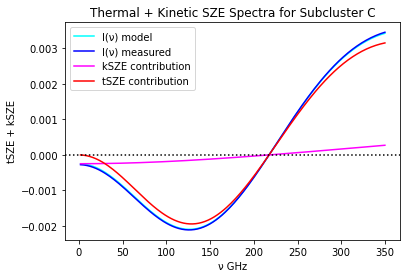

In [103]:
plt.plot(nu, I_C, color='aqua', label = 'I(\u03BD) model')
plt.plot(nu, I_C_measured, color='blue', label = 'I(\u03BD) measured')
plt.plot(nu, y_kSZ_C, color = 'magenta', label = 'kSZE contribution')
plt.plot(nu, y_tSZ_C, color = 'red', label = 'tSZE contribution')
plt.axhline(y=0, ls = ':', color = 'black')
plt.title("Thermal + Kinetic SZE Spectra for Subcluster C")
plt.xticks(ticks = [0,0.5*1e11,1*1e11,1.5*1e11,2*1e11,2.5*1e11,3*1e11,3.5*1e11],labels = [0,50,100,150,200,250,300,350])
plt.xlabel("\u03BD GHz")
plt.ylabel("tSZE + kSZE")
plt.legend()

In [104]:
#reproducing some of Adam et al's plots hopefully
nu = np.linspace(0,350,200)*GHz

T_e_A1 = 8.95*10**(7)*u.K
T_e_B1 = 1.3*10**(8)*u.K
T_e_C1 = 2.1*10**(8)*u.K
T_e_D1 = 1.57*10**(8)*u.K

vA = 2.78*10**5*u.m*u.s**(-1)
vB = 3.24*10**6*u.m*u.s**(-1)
vC = -7.33*10**5*u.m*u.s**(-1)
vD = 8.31*10**5*u.m*u.s**(-1)

Ia = S_t(nu, tau, T_e_A1) + S_k(nu, tau, vA)
Ib = S_t(nu, tau, T_e_B1) + S_k(nu, tau, vB)
Ic = S_t(nu, tau, T_e_C1) + S_k(nu, tau, vC)
Id = S_t(nu, tau, T_e_D1) + S_k(nu, tau, vD)

tSZ_A = S_t(nu, tau, T_e_A1)
tSZ_B = S_t(nu, tau, T_e_B1)
tSZ_C = S_t(nu, tau, T_e_C1)
tSZ_D = S_t(nu, tau, T_e_D1)

kSZ_A = S_k(nu,tau, vA)
kSZ_B = S_k(nu,tau, vB)
kSZ_C = S_k(nu,tau, vC)
kSZ_D = S_k(nu,tau, vD)

C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\julia\anaconda3\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


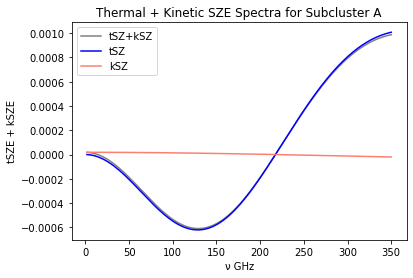

In [115]:
plt.plot(nu, Ia, color = 'gray', label = 'tSZ+kSZ')
plt.plot(nu, tSZ_A, color = 'blue', label = 'tSZ')
plt.plot(nu, kSZ_A, color = 'salmon', label = 'kSZ')
plt.title("Thermal + Kinetic SZE Spectra for Subcluster A")
plt.xticks(ticks = [0,0.5*1e11,1*1e11,1.5*1e11,2*1e11,2.5*1e11,3*1e11,3.5*1e11],labels = [0,50,100,150,200,250,300,350])
plt.xlabel("\u03BD GHz")
plt.ylabel("tSZE + kSZE")
plt.legend()
#plt.ylim(-0.0007,0.0002)

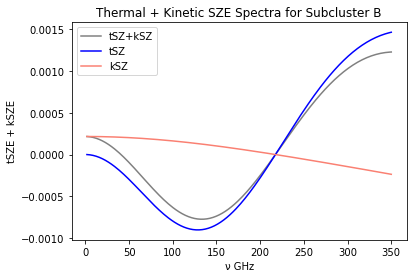

In [116]:
plt.plot(nu, Ib, color = 'gray', label = 'tSZ+kSZ')
plt.plot(nu, tSZ_B, color = 'blue', label = 'tSZ')
plt.plot(nu, kSZ_B, color = 'salmon', label = 'kSZ')
plt.title("Thermal + Kinetic SZE Spectra for Subcluster B")
plt.xticks(ticks = [0,0.5*1e11,1*1e11,1.5*1e11,2*1e11,2.5*1e11,3*1e11,3.5*1e11],labels = [0,50,100,150,200,250,300,350])
plt.xlabel("\u03BD GHz")
plt.ylabel("tSZE + kSZE")
plt.legend()

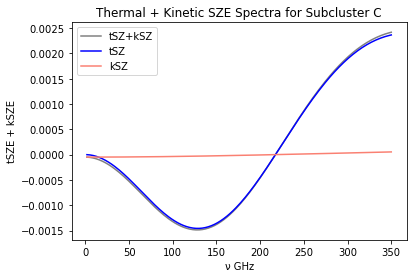

In [117]:
plt.plot(nu, Ic, color = 'gray', label = 'tSZ+kSZ')
plt.plot(nu, tSZ_C, color = 'blue', label = 'tSZ')
plt.plot(nu, kSZ_C, color = 'salmon', label = 'kSZ')
plt.title("Thermal + Kinetic SZE Spectra for Subcluster C")
plt.xticks(ticks = [0,0.5*1e11,1*1e11,1.5*1e11,2*1e11,2.5*1e11,3*1e11,3.5*1e11],labels = [0,50,100,150,200,250,300,350])
plt.xlabel("\u03BD GHz")
plt.ylabel("tSZE + kSZE")
plt.legend()

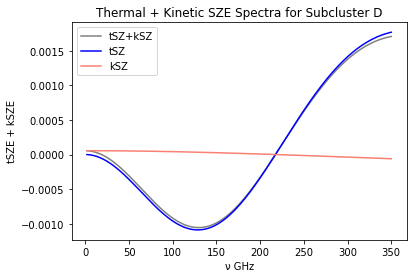

In [118]:
plt.plot(nu, Id, color = 'gray', label = 'tSZ+kSZ')
plt.plot(nu, tSZ_D, color = 'blue', label = 'tSZ')
plt.plot(nu, kSZ_D, color = 'salmon', label = 'kSZ')
plt.title("Thermal + Kinetic SZE Spectra for Subcluster D")
plt.xticks(ticks = [0,0.5*1e11,1*1e11,1.5*1e11,2*1e11,2.5*1e11,3*1e11,3.5*1e11],labels = [0,50,100,150,200,250,300,350])
plt.xlabel("\u03BD GHz")
plt.ylabel("tSZE + kSZE")
plt.legend()